In [47]:
# X Chapter 10 - Experimenting with NN

import os
import time
import numpy as np
from sklearn.neural_network import MLPClassifier

os.chdir("C:/Users/Manue/Documents/Practical Deeplearning")
# os.getcwd()

X_train = np.load("mnist/mnist_train_vectors.npy")
X_test = np.load("mnist/mnist_test_vectors.npy")
y_train = np.load("mnist/mnist_train_label.npy")
y_test = np.load("mnist/mnist_test_label.npy")


# Funktionen für die Experimente

def run(X_train, y_train, X_test, y_test, clf):
    s = time.time()
    clf.fit(X_train, y_train)
    e = time.time() - s
    loss = clf.loss_
    weights = clf.coefs_
    biases = clf.intercepts_
    params = 0
    for w in weights:
        params += w.shape[0]*w.shape[1]
    for b in biases:
        params += b.shape[0]

    return [clf.score(X_test, y_test), loss, params, e]

def nn(layer, act):
    return MLPClassifier(solver='sgd', verbose=False, tol=1e-8, nesterovs_momentum=False,
                        early_stopping=False, learning_rate_init=0.001, momentum=0.9, max_iter=200,
                        hidden_layer_sizes=layer, activation=act)


def main():
    X_train = np.load("mnist/mnist_train_vectors.npy")/256.0 # um 
    X_test = np.load("mnist/mnist_test_vectors.npy") /256.0 # um die Pixel zu standardisieren
    y_train = np.load("mnist/mnist_train_label.npy")
    y_test = np.load("mnist/mnist_test_label.npy")

    N = 1000
    X_train = X_train[:N]
    X_test = X_test[:N]
    y_train = y_train[:N]
    y_test = y_test[:N]

    # Definiert unterschiedliche Layer
    layers = [
        (1,), (500,), (800,), (2000,), (3000,)]
        #(1000, 500), (3000, 15000),
        #(2, 2, 2), (1000, 500, 300), (2000, 1000, 500),
    
    
    for act in ['relu', 'logistic', 'tanh']:
        print("%s:" % act)
        
        for layer in layers:
            scores = []
            loss = []
            tm = []
            
            for i in range(10):
                s, l, params, e = run(X_train, y_train, X_test, y_test, nn(layer, act))
                scores.append(s)
                loss.append(l)
                tm.append(e)
            s = np.array(scores)
            l = np.array(loss)
            t = np.array(tm)
            n = np.sqrt(s.shape[0])
            print("layers: %14s, score= %0.4f +/- %0.4f, loss = %0.4f +/- %0.4f (params = %6d, time = %0.2f s)" % \
                  (str(layer), s.mean(), s.std()/n, l.mean(), l.std()/n, params, t.mean()))



In [11]:
# Nicht ausführen, dauert sehr lange!
import warnings
warnings.filterwarnings('ignore')

# main()

relu:
layers:           (1,), score= 0.1974 +/- 0.0125, loss = 2.0284 +/- 0.0242 (params =    805, time = 0.89 s)
layers:         (500,), score= 0.8948 +/- 0.0012, loss = 0.3384 +/- 0.0005 (params = 397510, time = 11.61 s)
layers:         (800,), score= 0.8953 +/- 0.0010, loss = 0.3281 +/- 0.0012 (params = 636010, time = 19.11 s)
layers:        (2000,), score= 0.9000 +/- 0.0011, loss = 0.3128 +/- 0.0007 (params = 1590010, time = 47.03 s)
layers:        (3000,), score= 0.9012 +/- 0.0009, loss = 0.3082 +/- 0.0005 (params = 2385010, time = 69.42 s)
logistic:
layers:           (1,), score= 0.1638 +/- 0.0175, loss = 2.2586 +/- 0.0043 (params =    805, time = 1.06 s)
layers:         (500,), score= 0.7147 +/- 0.0030, loss = 1.5484 +/- 0.0027 (params = 397510, time = 12.12 s)
layers:         (800,), score= 0.7306 +/- 0.0023, loss = 1.4995 +/- 0.0023 (params = 636010, time = 20.27 s)
layers:        (2000,), score= 0.7540 +/- 0.0030, loss = 1.4262 +/- 0.0017 (params = 1590010, time = 49.97 s)
la

In [69]:
## Chapter 11

# Training Label
old = np.load("mnist/mnist_train_label.npy")
new = np.zeros(len(old), dtype="uint8")

new[np.where((old % 2)==0)] = 0
new[np.where((old % 2)==1)] = 1

np.save("mnist/mnist_even_odd_train_labels.npy", new)

# Test
old = np.load("mnist/mnist_test_label.npy")
new = np.zeros(len(old), dtype="uint8")

new[np.where((old % 2)==0)] = 0
new[np.where((old % 2)==1)] = 1
np.save("mnist/mnist_even_odd_test_labels.npy", new)


# 
def run(x_train, y_train, x_test, y_test, clf):
    clf.fit(x_train, y_train)
    return clf.predict_proba(x_test)


def nn(layers):
    return MLPClassifier(solver="sgd", verbose=False, tol=1e-8, nesterovs_momentum=False, early_stopping=False, batch_size=64,
                        learning_rate_init=0.001, momentum=0.9, max_iter=200, hidden_layer_sizes=layers, activation="relu")

def main():
    x_train = np.load("mnist/mnist_train_vectors.npy").astype("float64")/256.0
    y_train = np.load("mnist/mnist_even_odd_train_labels.npy")
    x_test = np.load("mnist/mnist_test_vectors.npy").astype("float64")/256.0
    y_test = np.load("mnist/mnist_even_odd_test_labels.npy").astype("float64")/256.0

    layers = [(2,), (100,), (100, 50), (500, 250)]
    mlayers =  ["2", "100", "100x50", "500x250"]

    for i, layer in enumerate(layers):
        prob = run(x_train, y_train, x_test, y_test, nn(layer))
        np.save("mnist/mnist_even_odds_proba_%s.npy" % mlayers[i], prob)
        print("model %s done" % i)
    
    
    
main()


model 0 done
model 1 done
model 2 done
model 3 done


AUC = 0.998918
AUC = 0.982598


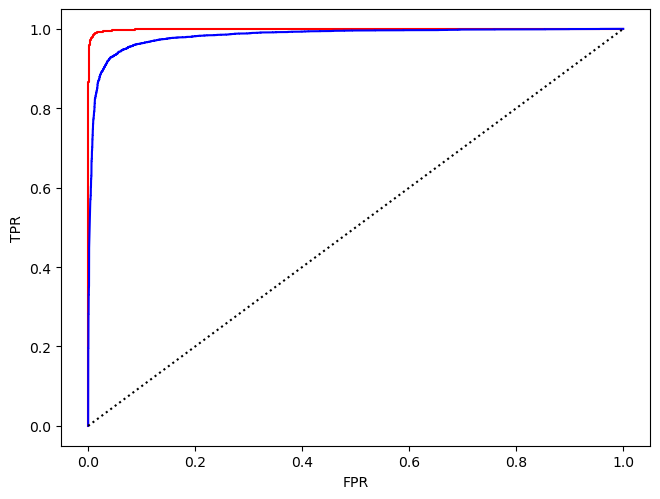

In [115]:
# Erstellen der ROC Kurven
import sys
import matplotlib.pylab as plt
from sklearn.metrics import roc_auc_score, roc_curve

def main():
    labels = np.load("mnist/mnist_even_odd_test_labels.npy")
    probs = np.load("mnist/mnist_even_odds_proba_500x250.npy")
    auc = roc_auc_score(labels, probs[:,1])
    roc = roc_curve(labels, probs[:,1])
    print("AUC = %0.6f" % auc)
    plt.plot(roc[0], roc[1], color='r')


    labels = np.load("mnist/mnist_even_odd_test_labels.npy")
    probs = np.load("mnist/mnist_even_odds_proba_2.npy")
    auc = roc_auc_score(labels, probs[:,1])
    roc = roc_curve(labels, probs[:,1])
    print("AUC = %0.6f" % auc)
    plt.plot(roc[0], roc[1], color='b')
    
    
    plt.plot([0,1], [0,1], color="k", linestyle=':')
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.tight_layout(pad=0, w_pad=0, h_pad=0)
    plt.show()

main()